In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


only keep the top 10,000 most frequently occurring words in the training data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [0]:
len(train_data)

25000

In [0]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [4]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


In [0]:
word_index

In [0]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
reverse_word_index

In [0]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
train_data[0]

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 281us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 94us/step - loss: 

In [0]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [21]:
history_dict

{'acc': [0.7813333335240682,
  0.9047333333651225,
  0.9284666666030884,
  0.9437333335558573,
  0.9542666663805643,
  0.9650000000635783,
  0.9704666668256123,
  0.9763333331108093,
  0.9821333333015442,
  0.9852666666348775,
  0.9892666665712992,
  0.9920666668256124,
  0.9928,
  0.9945333333333334,
  0.9979333333333333,
  0.9982666666666666,
  0.9970666666666667,
  0.9996,
  0.9970666666666667,
  0.9998666666666667],
 'loss': [0.5084239962100983,
  0.3004293828169505,
  0.21790880158742268,
  0.17504445971647897,
  0.14269256432056426,
  0.11499823224544525,
  0.09800445731480917,
  0.0806988224585851,
  0.06606590584119161,
  0.05608601301113764,
  0.04394616561532021,
  0.038141317198673884,
  0.02997900835374991,
  0.024697819440066816,
  0.017504990143080552,
  0.014906683942178886,
  0.01508774809439977,
  0.007531039784351985,
  0.012107063277562459,
  0.004109650041908026],
 'val_acc': [0.8683999997138977,
  0.8897000004768372,
  0.8711000000953675,
  0.8832000001907349,
  0.

In [0]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)

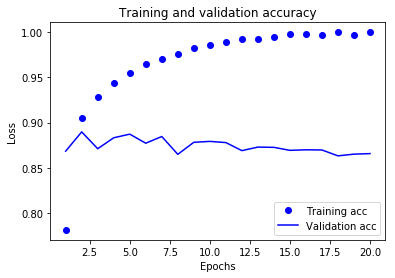

In [27]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Change epoch to 4

In [40]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.4432 - acc: 0.8202
Epoch 2/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2579 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.1998 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 2s 96us/step


In [41]:
results

[0.2930725459098816, 0.8844]

 multiclass

In [0]:
from keras.datasets import reuters

In [72]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [77]:
len(train_data)

8982

In [76]:
len(test_data)

2246

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [84]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 218us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

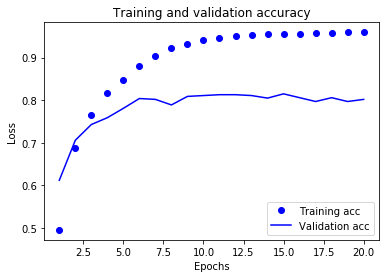

In [85]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

change epoch to 9

In [90]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 236us/step - loss: 2.5043 - acc: 0.5459 - val_loss: 1.7318 - val_acc: 0.6320
Epoch 2/9
7982/7982 [==============================] - 1s 87us/step - loss: 1.3879 - acc: 0.7038 - val_loss: 1.2876 - val_acc: 0.7170
Epoch 3/9
7982/7982 [==============================] - 1s 88us/step - loss: 1.0521 - acc: 0.7712 - val_loss: 1.1364 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 88us/step - loss: 0.8371 - acc: 0.8216 - val_loss: 1.0412 - val_acc: 0.7950
Epoch 5/9
7982/7982 [==============================] - 1s 87us/step - loss: 0.6724 - acc: 0.8596 - val_loss: 0.9815 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 88us/step - loss: 0.5395 - acc: 0.8890 - val_loss: 0.9516 - val_acc: 0.7920
Epoch 7/9
7982/7982 [==============================] - 1s 88us/step - loss: 0.4396 - acc: 0.9083 - val_loss: 0.9023 - val_acc: 0.8110
Epoch 8/9
798

In [91]:
results

[0.9935072912027659, 0.7836153161175423]

change units to 128 and epoch to 10

In [94]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 259us/step - loss: 2.2309 - acc: 0.5669 - val_loss: 1.4029 - val_acc: 0.6780
Epoch 2/10
7982/7982 [==============================] - 1s 93us/step - loss: 1.1090 - acc: 0.7611 - val_loss: 1.1758 - val_acc: 0.7380
Epoch 3/10
7982/7982 [==============================] - 1s 92us/step - loss: 0.7711 - acc: 0.8349 - val_loss: 0.9787 - val_acc: 0.7900
Epoch 4/10
7982/7982 [==============================] - 1s 91us/step - loss: 0.5606 - acc: 0.8815 - val_loss: 0.9085 - val_acc: 0.8100
Epoch 5/10
7982/7982 [==============================] - 1s 92us/step - loss: 0.4094 - acc: 0.9121 - val_loss: 0.9075 - val_acc: 0.8030
Epoch 6/10
7982/7982 [==============================] - 1s 93us/step - loss: 0.3133 - acc: 0.9330 - val_loss: 0.9130 - val_acc: 0.8030
Epoch 7/10
7982/7982 [==============================] - 1s 93us/step - loss: 0.2531 - acc: 0.9407 - val_loss: 0.9643 - val_acc: 0.7990
Epoch 

In [95]:
results

[1.0544029205692527, 0.798753339269813]

add one more hidden layer

In [98]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 288us/step - loss: 2.2222 - acc: 0.5283 - val_loss: 1.4073 - val_acc: 0.6820
Epoch 2/10
7982/7982 [==============================] - 1s 93us/step - loss: 1.1859 - acc: 0.7306 - val_loss: 1.1788 - val_acc: 0.7450
Epoch 3/10
7982/7982 [==============================] - 1s 92us/step - loss: 0.8745 - acc: 0.8053 - val_loss: 1.0478 - val_acc: 0.7920
Epoch 4/10
7982/7982 [==============================] - 1s 94us/step - loss: 0.6331 - acc: 0.8561 - val_loss: 0.9836 - val_acc: 0.7940
Epoch 5/10
7982/7982 [==============================] - 1s 94us/step - loss: 0.4768 - acc: 0.8975 - val_loss: 0.9672 - val_acc: 0.8020
Epoch 6/10
7982/7982 [==============================] - 1s 94us/step - loss: 0.3354 - acc: 0.9286 - val_loss: 0.9738 - val_acc: 0.8000
Epoch 7/10
7982/7982 [==============================] - 1s 92us/step - loss: 0.2899 - acc: 0.9331 - val_loss: 0.9350 - val_acc: 0.8140
Epoch 

In [99]:
results

[1.137774654509017, 0.790293855743544]